## Exercise for KYBS3050

### Mika Lammi 2022

## Description of data and goal of this exercise


### Creating a machine learning algorithm to detect spam emails

My goal is to create a machine learning model which can classify incoming emails as spam or non-spam emails. The practical usage would be to have the algorithm filter out spam emails from user's inbox to the spam folder.

My personal goal is to be able to make model at least 99 % accuracy and precision.


### What data am I using

The data I am using in this exercise is Spambase Data Set from UCI Machine learning repository [(source of the dataset)](https://archive.ics.uci.edu/ml/datasets/Spambase).

It is a collection of email data separated into two categories: spam and non-spam e-mails. The source of spam e-mails come from their postmaster and individuals who had filed those emails as spam. Collection of non-spam e-mails come from filed work and personal e-mails.

The data is useful for constructing personalized spam filters and it isn't really suitable for generating all purpose spam filters for general public. However, I think that his dataset is suitable for my current exercise.







In [3]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
# Download the data for usage
def getDataset():
    url = "https://www.dropbox.com/s/vwiyk1qeq87xuku/spambase.data.csv?dl=1"
    dataset = pd.read_csv(url).to_numpy()
    headers = pd.read_csv(url, index_col=0, nrows=0).columns.to_numpy()
    cols = dataset.shape[1]
    classifications = dataset[:, cols-1]
    data = dataset[:,0:cols-2]
    feature_names = headers[0:cols-2]
    return data, classifications, feature_names

# classification: 1 = spam, 0 = non-spam
_X, y, feature_names = getDataset()

In [5]:
print("Data shape: ", _X.shape)
print("Number of features: ", len(feature_names))
print("Feature names: ", feature_names)
print(f"Percentage of spam emails: {(sum(y)/len(y))*100:.2f}%")

Data shape:  (4601, 56)
Number of features:  56
Feature names:  ['word_freq_address' 'word_freq_all' 'word_freq_3d' 'word_freq_our'
 'word_freq_over' 'word_freq_remove' 'word_freq_internet'
 'word_freq_order' 'word_freq_mail' 'word_freq_receive' 'word_freq_will'
 'word_freq_people' 'word_freq_report' 'word_freq_addresses'
 'word_freq_free' 'word_freq_business' 'word_freq_email' 'word_freq_you'
 'word_freq_credit' 'word_freq_your' 'word_freq_font' 'word_freq_000'
 'word_freq_money' 'word_freq_hp' 'word_freq_hpl' 'word_freq_george'
 'word_freq_650' 'word_freq_lab' 'word_freq_labs' 'word_freq_telnet'
 'word_freq_857' 'word_freq_data' 'word_freq_415' 'word_freq_85'
 'word_freq_technology' 'word_freq_1999' 'word_freq_parts' 'word_freq_pm'
 'word_freq_direct' 'word_freq_cs' 'word_freq_meeting'
 'word_freq_original' 'word_freq_project' 'word_freq_re' 'word_freq_edu'
 'word_freq_table' 'word_freq_conference' 'char_freq_;' 'char_freq_('
 'char_freq_[' 'char_freq_!' 'char_freq_$' 'char_freq_#'
 

In [6]:
df = pd.DataFrame(_X, 
                  columns = feature_names)
df['is_spam'] = y
df

,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3.0,0.0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4.0,0.0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6.0,0.0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5.0,0.0


Let's visualize the data to gain better understanding of its nature:

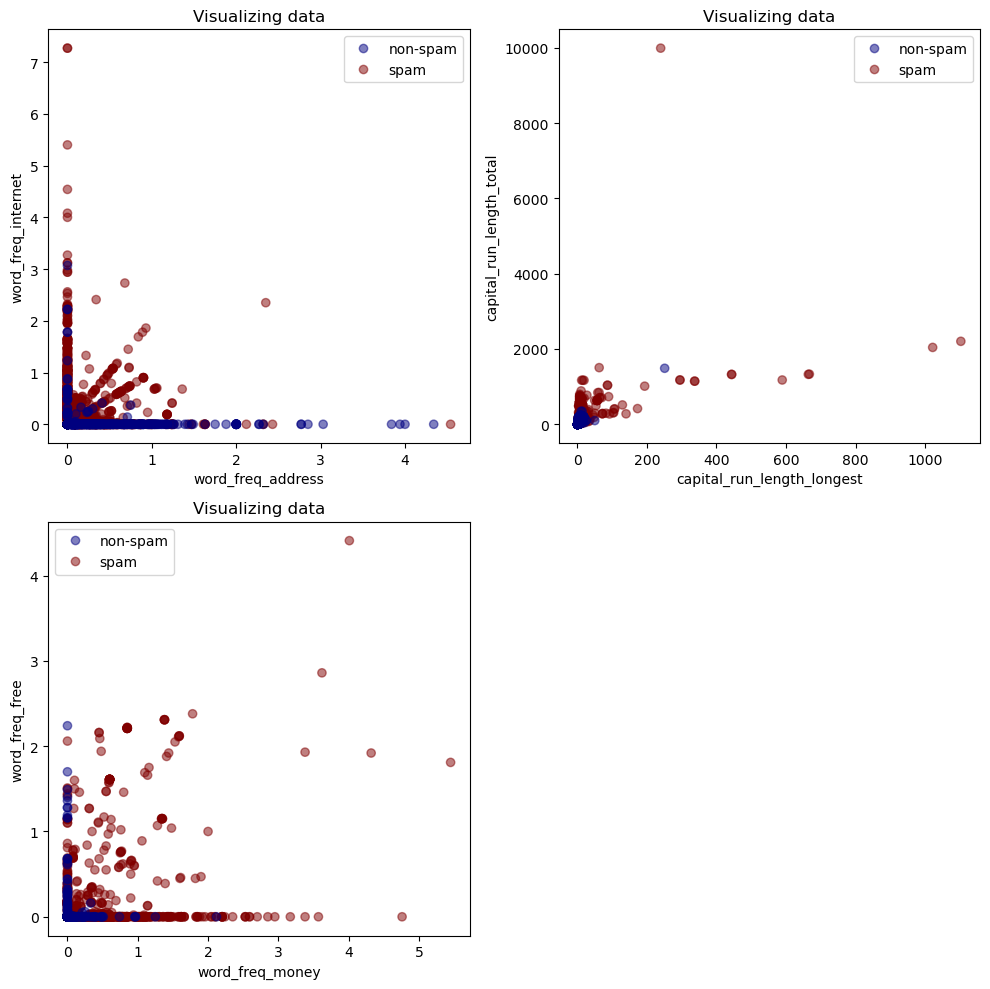

In [7]:
fig = plt.figure(dpi=100, figsize=(10, 10))
fig.add_subplot(2,2,1)
feature1 = 0
feature2 = 6
scatter = plt.scatter(_X[:,feature1],_X[:,feature2],c=y, alpha=0.5)
plt.set_cmap('jet')
plt.title("Visualizing data")
plt.xlabel(feature_names[feature1])
plt.ylabel(feature_names[feature2])
handles = scatter.legend_elements()[0]
plt.legend(handles=handles, labels=['non-spam', 'spam'])

fig.add_subplot(2,2,2)
feature3 = 54
feature4 = 55
scatter = plt.scatter(_X[:,feature3],_X[:,feature4],c=y, alpha=0.5)
plt.set_cmap('jet')
plt.title("Visualizing data")
plt.xlabel(feature_names[feature3])
plt.ylabel(feature_names[feature4])
handles = scatter.legend_elements()[0]
plt.legend(handles=handles, labels=['non-spam', 'spam'])

fig.add_subplot(2,2,3)
feature5 = 22
feature6 = 14
scatter = plt.scatter(_X[:,feature5],_X[:,feature6],c=y, alpha=0.5)
plt.set_cmap('jet')
plt.title("Visualizing data")
plt.xlabel(feature_names[feature5])
plt.ylabel(feature_names[feature6])
handles = scatter.legend_elements()[0]
plt.legend(handles=handles, labels=['non-spam', 'spam'])


plt.tight_layout()
plt.show()

As we can see from the visualization, some features have distinct linear correlation with each other. For example, words "free" and "money" correlate in spam emails, but those words are rarely together (if ever) in a single non-spam email.

Next, let's split the data into training data (66%) and test data (33%):

In [8]:
# Split data into training and test sets
def splitData(X, y, random_state=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random_state, shuffle=True)
    return X_train, y_train, X_test, y_test

_X_train, y_train, _X_test, y_test = splitData(_X, y)

print("Training data shape: ", _X_train.shape)
print("Test data shape: ", _X_test.shape)
print("Number of samples in the test data: ", len(y_test))
print("Number of samples in the training data: ", len(y_train))

Training data shape:  (3910, 56)
Test data shape:  (691, 56)
Number of samples in the test data:  691
Number of samples in the training data:  3910


### Preprocessing data

Standardization of a dataset is a common requirement for many machine learning estimators. Let's standardize the data so that it looks like standard normally distributed data, and then apply principal component analysis to get the principal components of the data. We want explained variance of principal components to be high to not remove important information from the data.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler() # Standardize so that average is 0 and variance is 1
pca = PCA(n_components=0.95) # We want the explained variance ratios to be high (in this case, 95%)

X_train_scaled = pca.fit_transform(scaler.fit_transform(_X_train))
X_test_scaled = pca.transform(scaler.fit_transform(_X_test))

n_principal_components = X_train_scaled.shape[1]
print("Number of principal components (explained variance >= 95%): ", n_principal_components)

Number of principal components (explained variance >= 95%):  47


### Visualizing preprocessed data:

In [10]:
# Visualize scaled and standardized data
df = pd.DataFrame(X_train_scaled)
df['is spam'] = y_train
df

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,is spam
0,-0.233665,-4.216986,3.854433,-5.239012,-2.935954,1.482201,3.589136,-7.304354,13.665291,-1.493560,...,-0.682215,1.529894,3.456264,-2.143721,-2.056355,-0.016444,-4.319036,-3.159568,0.402400,0.0
1,-0.290800,-1.474600,0.031259,0.477065,-0.500319,-0.623140,0.105618,0.278588,0.435383,-0.152298,...,0.189304,-0.033600,0.090435,-0.055140,-0.665829,-0.003594,-0.070516,0.092139,0.053887,0.0
2,-1.046882,1.103796,-0.940396,-0.046453,-0.545562,0.658739,1.171004,0.275677,-0.116973,0.444898,...,0.316192,-1.821637,0.184733,0.409685,-0.515317,0.053712,-0.028122,-0.109741,0.705660,1.0
3,0.385504,-1.281684,0.004383,0.223448,0.040606,-0.158030,-0.229980,0.791778,0.358015,-0.286879,...,0.334046,0.365060,-0.195780,-0.098178,-0.097604,0.025399,-0.594407,0.260137,0.113043,0.0
4,-0.850906,0.673210,-0.353597,-0.593110,-0.642697,-1.379087,-0.663090,-1.415256,-0.627311,-1.342915,...,-0.792551,-0.890485,0.931863,0.071517,0.748906,1.339194,-0.312082,0.339678,-0.598931,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,-0.624799,-0.574447,-0.396967,0.004089,-0.133466,-0.612583,0.535233,-0.616289,-0.654875,-0.712487,...,0.435861,0.513227,-0.251503,-0.538872,0.111657,0.160669,-0.128001,0.174834,0.472967,0.0
3906,-0.390586,-1.959647,-0.303435,0.516990,0.574182,-0.597355,-0.366052,0.953232,-0.525071,-0.557368,...,-0.054829,-0.094897,0.193848,0.067595,0.451900,-0.099142,0.395270,-0.046487,-0.089953,0.0
3907,-0.512171,0.552222,-0.484547,0.403724,-0.142547,-0.037957,-0.027832,0.076249,0.176678,0.240466,...,0.097913,-0.784672,-0.050490,0.483359,-0.594268,0.248522,-0.179466,-0.106605,0.033869,1.0
3908,-0.873453,1.329640,-0.582484,-1.244331,-0.943982,-1.418559,-1.270615,-0.601607,-0.411891,1.365763,...,2.150580,-0.749323,-1.956788,-1.607065,0.817752,-2.929302,-0.735560,-1.751427,-0.937153,1.0


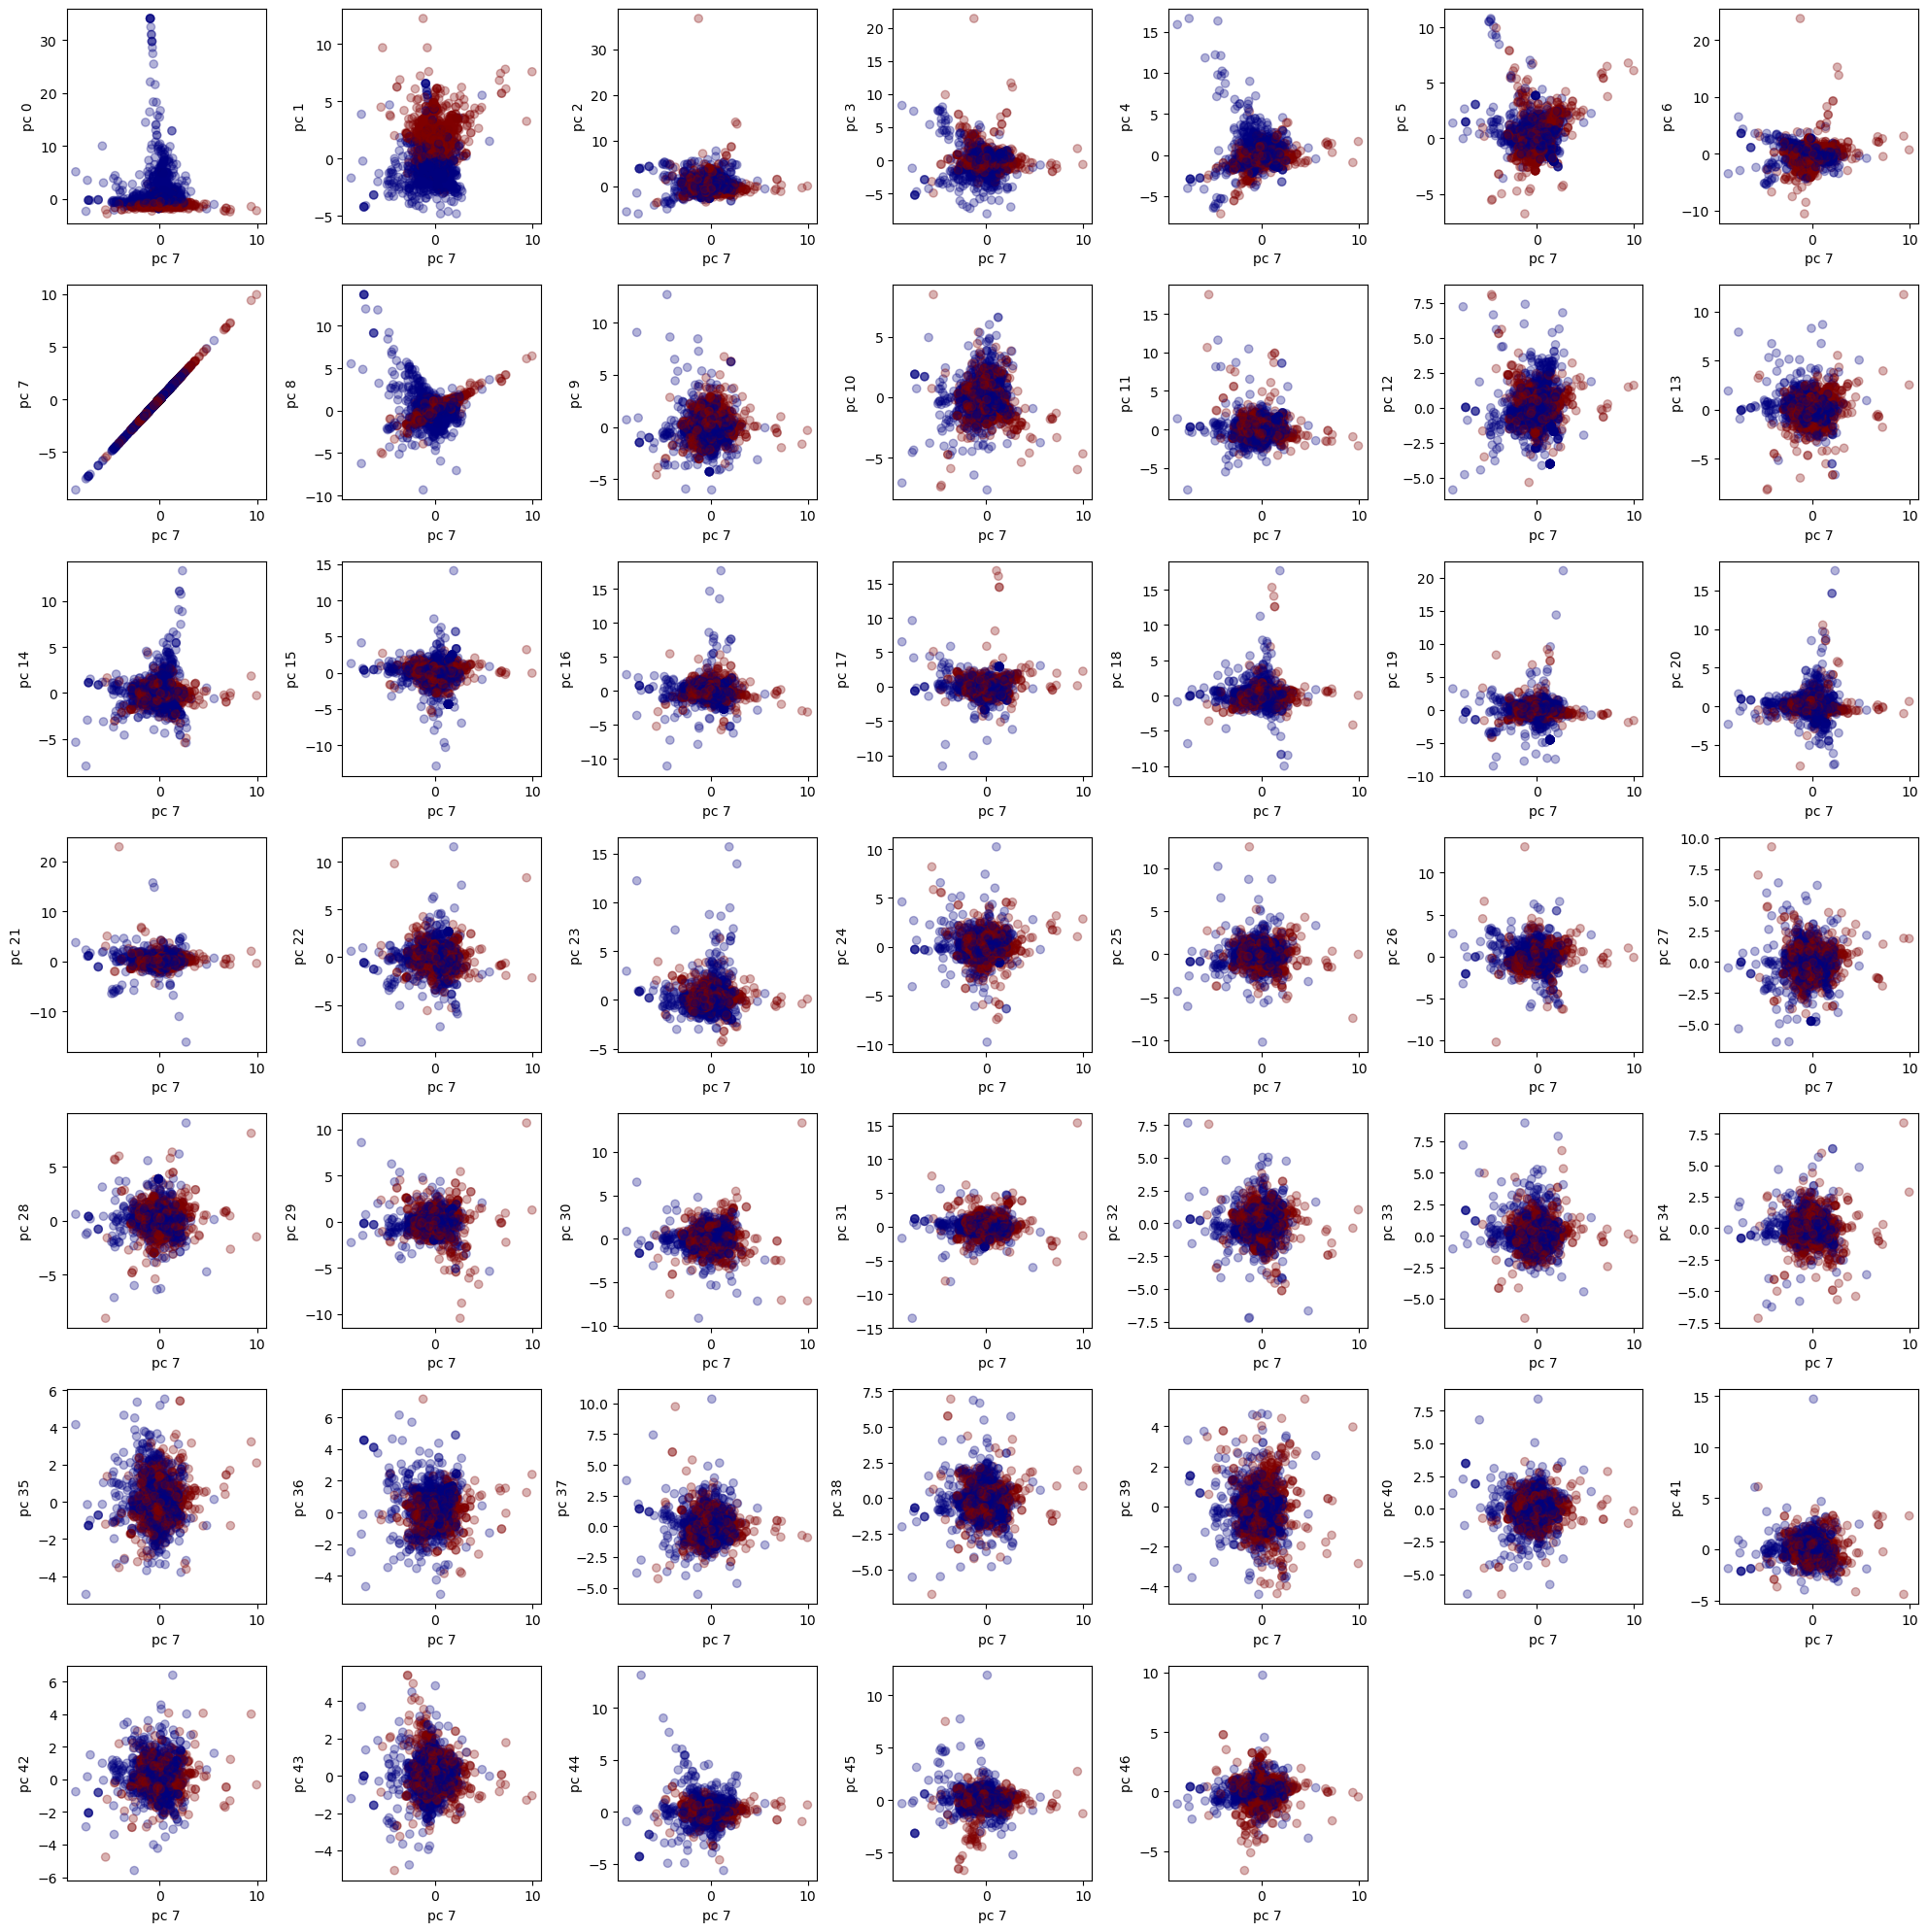

In [11]:
import math

def plot(X_std, y):
    dims = X_std.shape[1]
    temp = math.sqrt(dims)
    dim = math.ceil(temp)
    fig = plt.figure(dpi=100, figsize=(20, 20))
    plt.set_cmap("jet")
    x_dim = 7
    for i in range(0, dims):
            fig.add_subplot(dim, dim, i+1)
            plt.scatter(X_std[:,x_dim], X_std[:,i], c=y, alpha=0.3)
            plt.xlabel('pc ' + str(x_dim))
            ylabel = 'pc ' + str(i)
            plt.ylabel(ylabel)
    fig.tight_layout()
    plt.show()

plot(X_train_scaled, y_train)


## What metrics to use for model evaluation?

In email spam detection, a false positive would mean that an email that is non-spam has been falsely identified as spam, thus the user might lose important emails if the precision is not high for the spam detection model. On the other hand, high number of false negatives would mean that the spam filter is not working very well (spam messages are not filtered out), so recall is also important metric for our spam detection model.

Accuracy is a good "all around" evaluation metric for this case.

In [12]:
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
tf.random.set_seed(100)
print("TensorFlow version:", tf.__version__)

def create_keras_model(activation="relu", neurons=128, dropout=0, optimizer="Adam"):
    model = Sequential()
    model.add(Input(shape=(n_principal_components,)))
    model.add(Dense(neurons, activation=activation,))
    model.add(Dense(neurons, activation=activation))
    if dropout != None: model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss=tf.keras.losses.binary_crossentropy,
        optimizer=optimizer,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    ])
    return model

pca_keras = PCA(n_components=47)
clf_keras = KerasClassifier(model=create_keras_model, epochs= 50, batch_size=40, verbose= 0, random_state=100)
pipe_keras = Pipeline(steps=[('scaler', scaler), ("pca", pca_keras), ("clf", clf_keras)])

# Keras grid params
params_keras = dict(
    clf__model__activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], 
    clf__model__neurons = [8, 16, 32, 64, 128, 256], 
    clf__model__dropout=[0, 0.10, 0.20, 0.30], 
    clf__model__optimizer=['SGD', 'Adam', 'Adamax'])

grid_search_keras = GridSearchCV(
    pipe_keras, 
    param_grid=params_keras, 
    n_jobs=-1, 
    cv=5, 
    error_score="raise", 
    verbose=2, 
    refit=True,
    scoring='accuracy')

TensorFlow version: 2.9.1


In [13]:
grid_search_keras.fit(_X_train, y_train)
print("Max Precision Registred: {} using {}".format(round(grid_search_keras.best_score_,3), 
                                                   grid_search_keras.best_params_))


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Max Precision Registred: 0.943 using {'clf__model__activation': 'relu', 'clf__model__dropout': 0, 'clf__model__neurons': 256, 'clf__model__optimizer': 'Adamax'}


In [14]:
grid_search_keras.score(_X_train, y_train)

0.9869565217391304

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

clf_rf = RandomForestClassifier(random_state=100)
pipe_rf = Pipeline(steps=[('scaler', scaler), ("pca", pca), ("clf", clf_rf)])
params_rf = dict(
    clf__max_depth=[3, 4, 5, 6, 7],
    clf__n_estimators=[6,7,8,9,10,11,12,13],
    clf__max_features=[1],
)
grid_search_rf = GridSearchCV(pipe_rf, param_grid=params_rf, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

# clf_nb = MultinomialNB()
# pipe_nb = Pipeline(steps=[('scaler', scaler), ("pca", pca), ("clf", clf_nb)])
# params_nb = dict(
#     clf__alpha=[0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
# )
# grid_search_nb = GridSearchCV(pipe_nb, param_grid=params_nb, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

clf_lr = LogisticRegression(random_state=100)
pipe_lr = Pipeline(steps=[('scaler', scaler), ("pca", pca), ("clf", clf_lr)])
params_lr = dict(
    clf__solver=["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
)
grid_search_lr = GridSearchCV(pipe_lr, param_grid=params_lr, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")


# normalizer = MinMaxScaler()
clf_kn = KNeighborsClassifier()
pipe_kn = Pipeline(steps=[('scaler', scaler), ("pca", pca), ("clf", clf_kn)])
params_kn = dict(
    clf__n_neighbors= np.arange(3,10)
)
grid_search_kn = GridSearchCV(pipe_kn, param_grid=params_kn, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

clf_svm = SVC(probability=True, random_state=100)
pipe_svm = Pipeline(steps=[('scaler', scaler), ("pca", pca), ("clf", clf_svm)])
params_svm = dict(
    clf__kernel=["linear", "rbf", "poly", "sigmoid"],
    clf__C= [0.1, 1, 10, 100],
    clf__gamma= [1, 0.1, 0.01, 0.001]
)
grid_search_svm = GridSearchCV(pipe_svm, param_grid=params_svm, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

clf_mlp = MLPClassifier(random_state=100)
pipe_mlp = Pipeline(steps=[('scaler', scaler), ("pca", pca), ("clf", clf_mlp)])
params_mlp = dict(
    clf__alpha=[0.5, 1, 1.5, 2],
    clf__max_iter=[500, 1000]
)
grid_search_mlp = GridSearchCV(pipe_mlp, param_grid=params_mlp, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

clf_dt = DecisionTreeClassifier(random_state=100)
pipe_dt = Pipeline(steps=[('scaler', scaler), ("pca", pca), ("clf", clf_dt)])
params_dt = dict(
    clf__max_depth=[3,4,5,6,7]
)
grid_search_dt = GridSearchCV(pipe_dt, param_grid=params_dt, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")



In [16]:
grid_search_rf.fit(_X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_rf.best_score_,3), 
                                                   grid_search_rf.best_params_))
# grid_search_nb.fit(_X, y)
# print("Max Accuracy Registred: {} using {}".format(round(grid_search_nb.best_score_,3), 
#                                                    grid_search_nb.best_params_))
grid_search_lr.fit(_X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_lr.best_score_,3), 
                                                   grid_search_lr.best_params_))
grid_search_kn.fit(_X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_kn.best_score_,3), 
                                                   grid_search_kn.best_params_))
grid_search_svm.fit(_X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_svm.best_score_,3), 
                                                   grid_search_svm.best_params_))
grid_search_mlp.fit(_X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_mlp.best_score_,3), 
                                                   grid_search_mlp.best_params_))
grid_search_dt.fit(_X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_dt.best_score_,3), 
                                                   grid_search_dt.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Max Accuracy Registred: 0.868 using {'clf__max_depth': 7, 'clf__max_features': 1, 'clf__n_estimators': 13}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Max Accuracy Registred: 0.924 using {'clf__solver': 'newton-cg'}
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Max Accuracy Registred: 0.902 using {'clf__n_neighbors': 7}
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Max Accuracy Registred: 0.929 using {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Max Accuracy Registred: 0.941 using {'clf__alpha': 0.5, 'clf__max_iter': 500}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Max Accuracy Registred: 0.887 using {'clf__max_depth': 7}


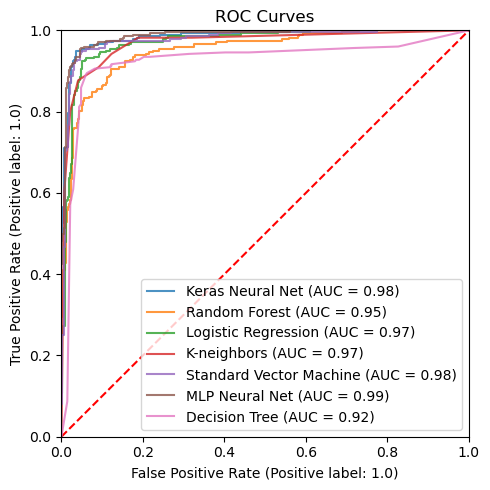

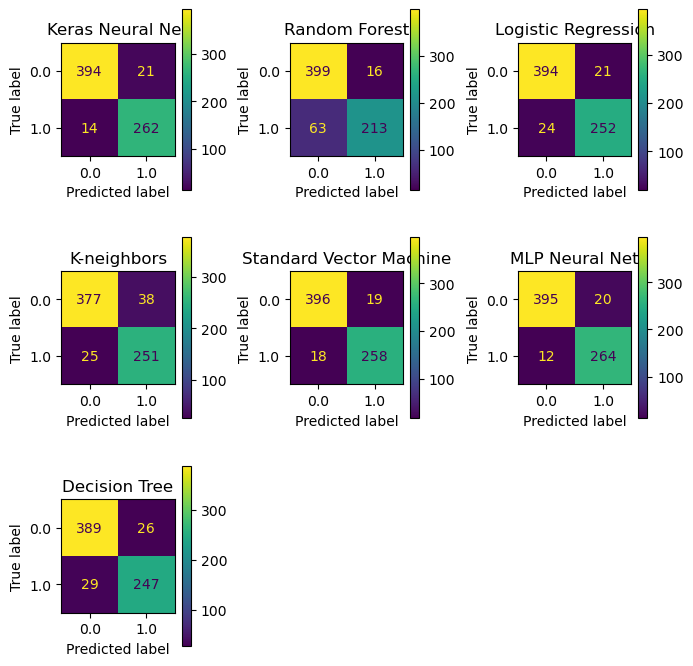

,precision,recall,f1-score,support
0.0,0.965686,0.949398,0.957473,415.000000
1.0,0.925795,0.949275,0.937388,276.000000
accuracy,0.949349,0.949349,0.949349,0.949349
macro avg,0.945741,0.949336,0.947430,691.000000
weighted avg,0.949753,0.949349,0.949451,691.000000


,precision,recall,f1-score,support
0.0,0.863636,0.961446,0.909920,415.000000
1.0,0.930131,0.771739,0.843564,276.000000
accuracy,0.885673,0.885673,0.885673,0.885673
macro avg,0.896884,0.866592,0.876742,691.000000
weighted avg,0.890196,0.885673,0.883416,691.000000


,precision,recall,f1-score,support
0.0,0.942584,0.949398,0.945978,415.000000
1.0,0.923077,0.913043,0.918033,276.000000
accuracy,0.934877,0.934877,0.934877,0.934877
macro avg,0.932830,0.931221,0.932006,691.000000
weighted avg,0.934792,0.934877,0.934816,691.000000


,precision,recall,f1-score,support
0.0,0.937811,0.908434,0.922889,415.000000
1.0,0.868512,0.909420,0.888496,276.000000
accuracy,0.908828,0.908828,0.908828,0.908828
macro avg,0.903162,0.908927,0.905692,691.000000
weighted avg,0.910132,0.908828,0.909151,691.000000


,precision,recall,f1-score,support
0.0,0.956522,0.954217,0.955368,415.000000
1.0,0.931408,0.934783,0.933092,276.000000
accuracy,0.946454,0.946454,0.946454,0.946454
macro avg,0.943965,0.944500,0.944230,691.000000
weighted avg,0.946491,0.946454,0.946471,691.000000


,precision,recall,f1-score,support
0.0,0.970516,0.951807,0.961071,415.00000
1.0,0.929577,0.956522,0.942857,276.00000
accuracy,0.953690,0.953690,0.953690,0.95369
macro avg,0.950047,0.954164,0.951964,691.00000
weighted avg,0.954164,0.953690,0.953796,691.00000


,precision,recall,f1-score,support
0.0,0.930622,0.937349,0.933974,415.000000
1.0,0.904762,0.894928,0.899818,276.000000
accuracy,0.920405,0.920405,0.920405,0.920405
macro avg,0.917692,0.916138,0.916896,691.000000
weighted avg,0.920293,0.920405,0.920331,691.000000


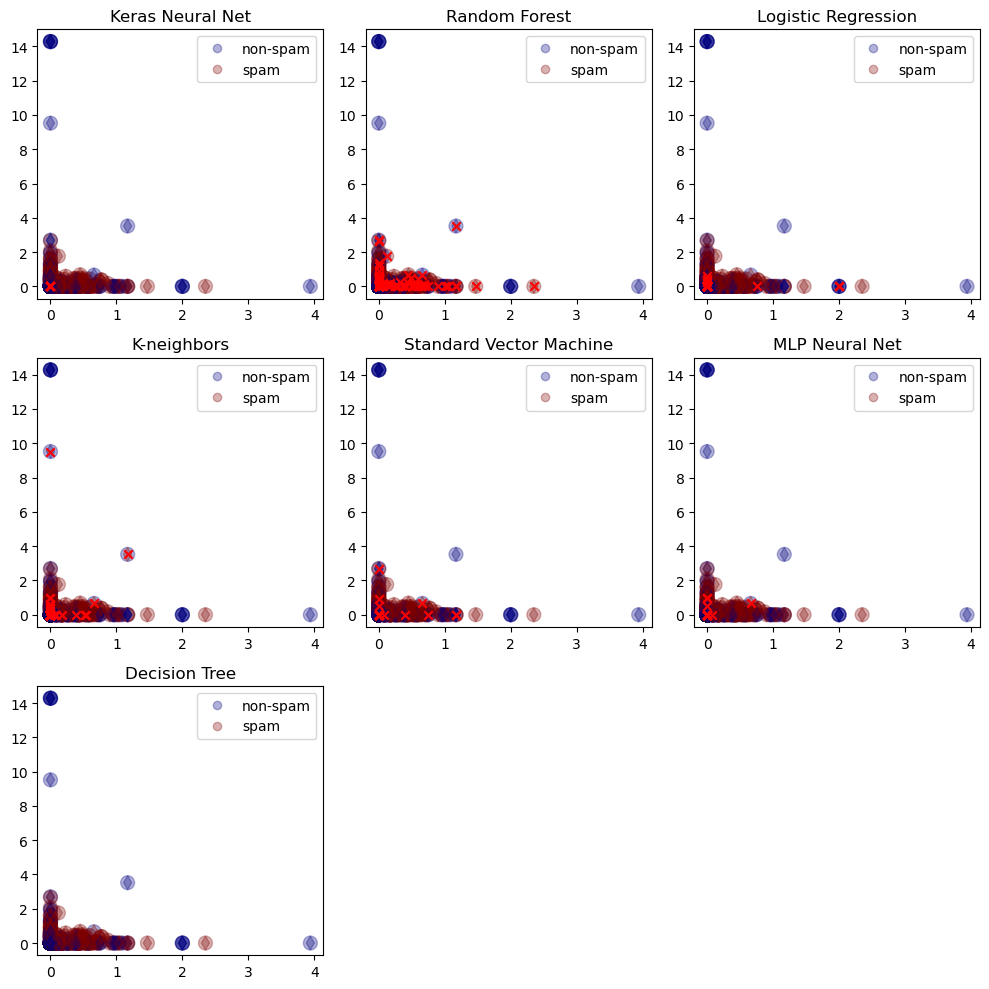

In [17]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

classifiers = ['Keras Neural Net', 'Random Forest', 'Logistic Regression', 'K-neighbors', 'Standard Vector Machine', 'MLP Neural Net', 'Decision Tree']
grids = [grid_search_keras, grid_search_rf, grid_search_lr, grid_search_kn, grid_search_svm, grid_search_mlp, grid_search_dt]

# Get anomalies (points with low confidence)
def get_anomalies(model, X_in, min_confidence=0.8):
    y_pred = model.predict_proba(X_in)
    anomaly_ids = np.where((y_pred < min_confidence) & (y_pred > (1-min_confidence)))
    return X_in[anomaly_ids[0]]

fig = plt.figure(dpi=100, figsize=(5, 5))
plt.title("ROC Curves")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
num_grids = len(grids)
dim = math.ceil(math.sqrt(num_grids))
roc_display = None

for i, model in enumerate(grids):
    ax = plt.gca()
    roc_display = RocCurveDisplay.from_estimator(model, _X_test, y_test, ax=ax, name=classifiers[i], alpha=0.8)
fig.tight_layout()
plt.show()

fig = plt.figure(dpi=100, figsize=(7, 7))
for i, model in enumerate(grids):
    fig.add_subplot(dim, dim, i+1)
    plt.title(classifiers[i])
    ax = plt.gca()
    cm_display = ConfusionMatrixDisplay.from_estimator(model, _X_test, y_test, ax=ax)
fig.tight_layout()
plt.show()

from IPython.display import display, HTML

for i, model in enumerate(grids):
    predictions = model.predict(_X_test)
    report = classification_report(y_test, predictions, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df.round(decimals=2)
    title = f"<h2>{classifiers[i]}</h2>"
    display(HTML(title))
    display(HTML(df.to_html()))

fig = plt.figure(dpi=100, figsize=(10, 10))
for i, model in enumerate(grids):
    fig.add_subplot(dim, dim, i+1)
    plt.title(classifiers[i])
    predictions = model.predict(_X_test)
    _X_anom = get_anomalies(model, _X_test, 0.6)

    ax = plt.gca()
    scatter1 = plt.scatter(_X_test[:,0],_X_test[:,1],c=y_test,marker='o',s=100,alpha=0.3, label="test")
    scatter2 = plt.scatter(_X_test[:,0],_X_test[:,1],c=predictions,marker='d',s=50,alpha=0.3, label="predictions")
    scatter3 = plt.scatter(_X_anom[:,0],_X_anom[:,1],color='red',marker='x', label="anomalies", alpha=0.8)
    handles = scatter1.legend_elements()[0]
    # print(handles)
    plt.legend(handles=handles, labels=['non-spam', 'spam'])

plt.tight_layout()
plt.show()

In [61]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf_rf = RandomForestClassifier()
model_rf = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1, scoring='precision')
model_rf.fit(X_train_scaled,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, scoring='precision', verbose=5)

In [62]:
predictionforest = model_rf.best_estimator_.predict(X_test_scaled)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

[[874  17]
 [134 494]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       891
         1.0       0.97      0.79      0.87       628

    accuracy                           0.90      1519
   macro avg       0.92      0.88      0.89      1519
weighted avg       0.91      0.90      0.90      1519

